In [109]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt

In [2]:
(xtrain, ytrain),(xtest, ytest) = boston_housing.load_data()

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
xtrain = StandardScaler().fit_transform(xtrain)

In [75]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, 'relu'),
        tf.keras.layers.Dense(64, 'relu'),
        tf.keras.layers.Dense(1)
    ])
    
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [84]:
k = 4
epochs = 100
val_size = len(xtrain)//4
score = []
for i in range(k):
    print(f"Processing {i}")
    val_data = xtrain[i*val_size : (i+1)*val_size]
    val_target = ytrain[i*val_size : (i+1)*val_size]
    train_data = np.concatenate((xtrain[0:i*val_size,:], xtrain[(i+1)*val_size:,:]), axis = 0)
    target_data= np.concatenate((ytrain[0:i*val_size], ytrain[(i+1)*val_size:]), axis = 0)
    model = build_model()
    history = model.fit(train_data, target_data, epochs=epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_target)
    score.append(history.history['mae'])
    


Processing 0
4/4 [==============================] - 0s 3ms/step - loss: 7.2277 - mae: 1.9485
Processing 1
4/4 [==============================] - 0s 3ms/step - loss: 9.9938 - mae: 2.3690
Processing 2
4/4 [==============================] - 0s 4ms/step - loss: 14.9947 - mae: 2.5949
Processing 3
4/4 [==============================] - 0s 3ms/step - loss: 10.7671 - mae: 2.3294


In [91]:
np.mean(history.history['mae'])

2.60296000957489

In [105]:
mean_score = []
for i in range(100):
    sum = 0
    for j in range(4):
        sum += score[j][i]
    mean_score.append(sum/4.0)
        

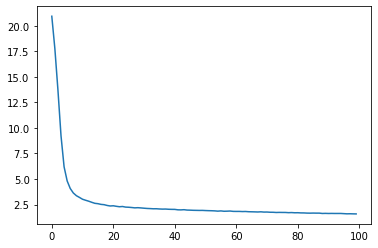

In [110]:
plt.plot(range(len(mean_score)), mean_score)

In [118]:
average_score = [np.mean(x[i]) for x in score for i in range(100)]


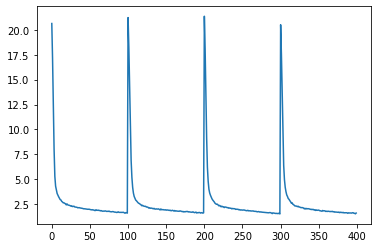

In [124]:
plt.plot(range(len(average_score)), average_score)

In [ ]:
average_mae_history = [np.mean(x[i]) for x in score for i in range(epochs)]

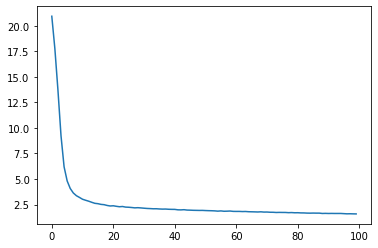

In [147]:
plt.plot(range(100), [np.mean([x[i] for x in score])for i in range(epochs)])